## TASK 1 : TITANIC SURVIVAL PREDICTION

In [10]:
#import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings('ignore')

In [12]:
#load data
data = pd.read_csv('Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data.shape

(891, 12)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
#check null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
#missing values
data['Age'].fillna(data['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [19]:
data = data.dropna()

In [20]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [22]:
data['Survived'].value_counts()

Survived
1    123
0     60
Name: count, dtype: int64

In [23]:
data["Sex"].value_counts()

Sex
male      95
female    88
Name: count, dtype: int64

In [24]:
data["Pclass"].value_counts()

Pclass
1    158
2     15
3     10
Name: count, dtype: int64

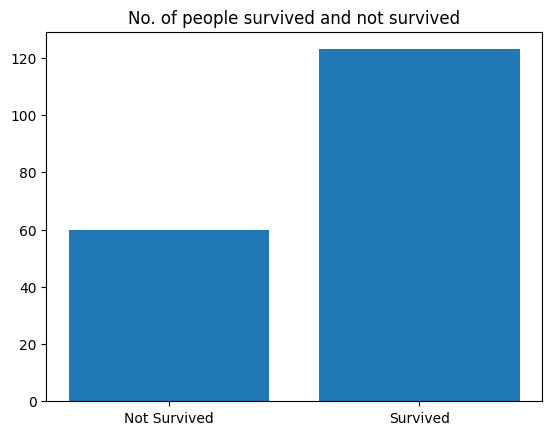

In [27]:
a=data["Survived"].value_counts()
x=["Not Survived","Survived"]
y=[a[i] for i in range(0,2)]
plt.bar(x,y)
plt.title("No. of people survived and not survived")
plt.show()

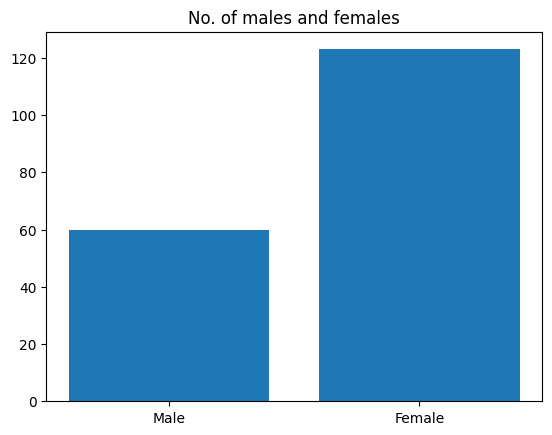

In [29]:
b=data["Sex"].value_counts()
x=["Male","Female"]
y=[a[i] for i in range(0,2)]
plt.bar(x,y)
plt.title("No. of males and females")
plt.show()

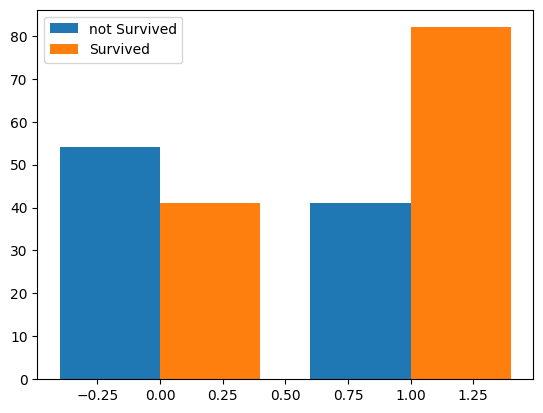

In [30]:
x=["male","female"]
c=data[data["Survived"]==0]["Sex"].value_counts()
d=data[data["Survived"]==1]["Sex"].value_counts()
y_male=[c[0],d[1]]
y_female=[d[1],d[0]]
x_axis=np.arange(len(x))
plt.bar(x_axis - 0.2,y_male, 0.4,label='not Survived')
plt.bar(x_axis + 0.2, y_female, 0.4,label="Survived")
plt.legend()
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

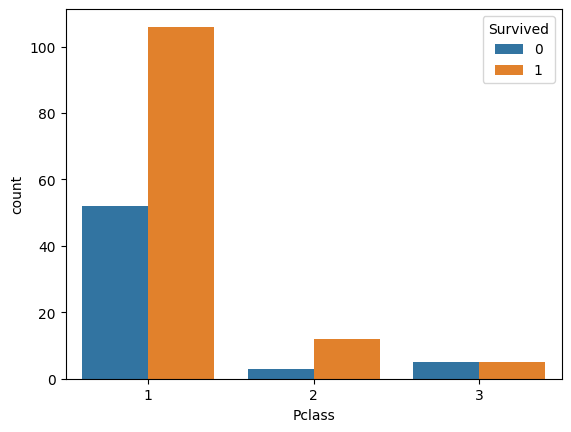

In [31]:
#Create a Countplot for the pclass column
sns.countplot(data=data,x='Pclass', hue='Survived')

In [32]:
data["Embarked"].value_counts()

Embarked
S    116
C     65
Q      2
Name: count, dtype: int64

In [33]:
#Converting columns into categorical columns
data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,0
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,0


In [39]:
x=data.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1)
y=data['Survived']

In [40]:
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,1,38.0,1,0,71.2833,1
3,1,1,1,35.0,1,0,53.1000,0
6,0,1,0,54.0,0,0,51.8625,0
10,1,3,1,4.0,1,1,16.7000,0
11,1,1,1,58.0,0,0,26.5500,0
...,...,...,...,...,...,...,...,...
871,1,1,1,47.0,1,1,52.5542,0
872,0,1,0,33.0,0,0,5.0000,0
879,1,1,1,56.0,0,1,83.1583,1
887,1,1,1,19.0,0,0,30.0000,0


In [41]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [42]:
data[['Survived', 'Sex', 'Pclass']]

,Survived,Sex,Pclass
1,1,1,1
3,1,1,1
6,0,0,1
10,1,1,3
11,1,1,1
...,...,...,...
871,1,1,1
872,0,0,1
879,1,1,1
887,1,1,1


In [43]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,0
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,11751,52.5542,D35,0
872,873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,695,5.0000,B51 B53 B55,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0


In [44]:
# Drop the column which are irrelevant for the survival prediction, such as passengerId, Name and ticket
data.drop(columns = {'PassengerId', 'Name', 'Ticket'},axis = 1, inplace = True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,1,38.0,1,0,71.2833,C85,1
3,1,1,1,35.0,1,0,53.1000,C123,0
6,0,1,0,54.0,0,0,51.8625,E46,0
10,1,3,1,4.0,1,1,16.7000,G6,0
11,1,1,1,58.0,0,0,26.5500,C103,0
...,...,...,...,...,...,...,...,...,...
871,1,1,1,47.0,1,1,52.5542,D35,0
872,0,1,0,33.0,0,0,5.0000,B51 B53 B55,0
879,1,1,1,56.0,0,1,83.1583,C50,1
887,1,1,1,19.0,0,0,30.0000,B42,0


In [45]:
X = data.drop(columns = 'Survived', axis = 1)
Y = data['Survived']

In [46]:
print(X)
print(Y)

     Pclass  Sex   Age  SibSp  Parch     Fare        Cabin  Embarked
1         1    1  38.0      1      0  71.2833          C85         1
3         1    1  35.0      1      0  53.1000         C123         0
6         1    0  54.0      0      0  51.8625          E46         0
10        3    1   4.0      1      1  16.7000           G6         0
11        1    1  58.0      0      0  26.5500         C103         0
..      ...  ...   ...    ...    ...      ...          ...       ...
871       1    1  47.0      1      1  52.5542          D35         0
872       1    0  33.0      0      0   5.0000  B51 B53 B55         0
879       1    1  56.0      0      1  83.1583          C50         1
887       1    1  19.0      0      0  30.0000          B42         0
889       1    0  26.0      0      0  30.0000         C148         1

[183 rows x 8 columns]
1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [48]:
print(x.shape,x_train.shape,x_test.shape)

(183, 8) (146, 8) (37, 8)


In [49]:
x_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [50]:
model = LogisticRegression()

In [51]:
model.fit(x_train, y_train)

LogisticRegression()

In [53]:
model=LogisticRegression(max_iter=200)
model

LogisticRegression(max_iter=200)

In [54]:
LogisticRegression(max_iter=200)

LogisticRegression(max_iter=200)

In [55]:
# Fit the model to the training data
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [56]:
# Now you can make predictions
x_train_prediction = model.predict(x_train)

In [61]:
x_test_prediction = model.predict(x_test)

In [62]:
print(x_train_prediction)

[1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1
 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0
 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1]


In [63]:
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [64]:
print(x_test_prediction)

[1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0]


In [65]:
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [66]:
print('Accuracy score of test data is : ', testing_data_accuracy)

Accuracy score of test data is :  1.0


In [67]:
test_data_precision = precision_score(y_test, x_test_prediction)

In [68]:
print('test data precion is :', test_data_precision)

test data precion is : 1.0


In [69]:
test_data_recall = recall_score(y_train, x_train_prediction)  # recall score

In [70]:
train_data_precision = precision_score(y_train, x_train_prediction) #precision

In [71]:
print('test data precion is:', test_data_precision)

test data precion is: 1.0


In [72]:
test_data_recall = recall_score(y_train, x_train_prediction)

In [73]:
print('test data recall is :', test_data_recall)

test data recall is : 1.0


In [74]:
from sklearn import metrics

In [75]:
score = model.score(x_test, y_test)
print(score)

1.0


In [76]:
cm = metrics.confusion_matrix(y_train, x_train_prediction)
print(cm)

[[47  0]
 [ 0 99]]


In [77]:
from sklearn import metrics # Make sure to import the metrics module if you haven't already

score = model.score(x_test, y_test)
print(score)

1.0


Text(0.5, 1.0, "('Accuracy Score:', 1.0)")

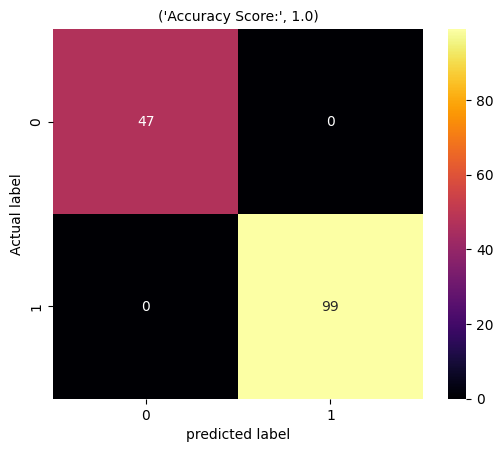

In [78]:
sns.heatmap(cm, annot = True, fmt = 'd', square = True, cmap= "inferno")
plt.ylabel('Actual label')
plt.xlabel('predicted label')
title = ('Accuracy Score:' , score)
plt.title(title, size = 10)

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
model_2 = RandomForestClassifier(n_estimators = 100)

In [81]:
model_2.fit(x_train, y_train)

RandomForestClassifier()

In [82]:
x_test_pred = model_2.predict(x_test)

In [83]:
model_2.score(x_train, y_train)
acc_score = round(model_2.score(x_test,y_test) * 100, 2)
model_2_acc = accuracy_score(x_test_pred, y_test)

In [84]:
model_2_acc

1.0

In [85]:
precision = precision_score(x_test_pred, y_test)
recall = recall_score(x_test_pred, y_test)

In [86]:
print(precision)
print(recall)

1.0
1.0


In [87]:
classification_report(x_test_pred, y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        13\n           1       1.00      1.00      1.00        24\n\n    accuracy                           1.00        37\n   macro avg       1.00      1.00      1.00        37\nweighted avg       1.00      1.00      1.00        37\n'

In [88]:
from sklearn.neighbors import KNeighborsClassifier
     
model_3 = KNeighborsClassifier(n_neighbors = 3)
     
model_3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [89]:
x_test_pred = model_3.predict(x_test)
     
model_3_acc = accuracy_score(x_test_pred, y_test, normalize = True)
     
model_3_score = round(model_3.score(x_train, y_train) * 100, 2)

In [90]:
model_3_precision = precision_score(x_test_pred, y_test)
model_3_recall = recall_score(x_test_pred, y_test)

In [91]:
model_3_score

81.51

In [92]:
model_3_acc

0.6486486486486487

In [93]:
print(model_3_precision)
print(model_3_recall)


0.875
0.6774193548387096


In [94]:
classification_report(x_test_pred, y_test)

'              precision    recall  f1-score   support\n\n           0       0.23      0.50      0.32         6\n           1       0.88      0.68      0.76        31\n\n    accuracy                           0.65        37\n   macro avg       0.55      0.59      0.54        37\nweighted avg       0.77      0.65      0.69        37\n'

In [95]:
print(x)
print(y)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
1           1       1    1  38.0      1      0  71.2833         1
3           1       1    1  35.0      1      0  53.1000         0
6           0       1    0  54.0      0      0  51.8625         0
10          1       3    1   4.0      1      1  16.7000         0
11          1       1    1  58.0      0      0  26.5500         0
..        ...     ...  ...   ...    ...    ...      ...       ...
871         1       1    1  47.0      1      1  52.5542         0
872         0       1    0  33.0      0      0   5.0000         0
879         1       1    1  56.0      0      1  83.1583         1
887         1       1    1  19.0      0      0  30.0000         0
889         1       1    0  26.0      0      0  30.0000         1

[183 rows x 8 columns]
1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64


In [96]:
p1 = model.predict([[3, 0, 34.5, 0, 0, 7.8292, 2,0]])

In [97]:
# Assuming the missing feature should be a 0 at the end
p1 = model.predict([[3, 0, 34.5, 0, 0, 7.8292, 2, 0]])

In [98]:
p1 = model.predict([[3, 0, 34.5, 0, 0, 7.8292, 2, 0]])
p2 = model_2.predict([[3, 0, 34.5, 0, 0, 7.8292, 2, 0]])
p3 = model_3.predict([[3, 0, 34.5, 0, 0, 7.8292, 2, 0]])

In [99]:
print(p1)
print(p2)
print(p3)

[1]
[1]
[0]


In [100]:
p1 = model.predict([[2, 0, 38.5, 0, 0, 7.2500, 0, 0]])
p2 = model_2.predict([[2, 0, 38.5, 0, 0, 7.2500, 0, 0]])
p3 = model_3.predict([[2, 0, 38.5, 0, 0, 7.2500, 0, 0]])

print(p1)
print(p2)
print(p3)

[1]
[1]
[0]
